# T2. PROBABILISTIC CLASSIFIERS 

- LINEAR DISCRIMINANT ANALYSIS (LDA)
- NAÏVE BAYES
- KNN
- DECISION TREES 

## 2.1 LINEAR DISCRIMINANT ANALYSIS (LDA)

The Bayes theorem in the context of data classification:
\begin{equation*}
p(\omega_i|\vec{x}) = \frac{p(\vec{x}|\omega_i) p(\omega_i)}{p(\vec{x})}
\end{equation*}
where $\vec{x} = \{x_1,\dots,x_d\}$ is an observation in a d-dimensional feature space and $\omega_i$ is a label for class $i$. 
Bayesian decision theory: Assign observation $\vec{x}$ to the class that maximizes the posterior probability $p(\omega_i|\vec{x})$:
\begin{equation*}
\text{argmax}_{i \in 1,\dots,G} p(\omega_i|\vec{x}) 
\end{equation*}

We define the discriminant function $g_i(\vec{x})$ as:
\begin{equation*}
g_i(\vec{x}) = \log p(\omega_i|\vec{x}) = \log p(\vec{x}|\omega_i) + \log p(\omega_i)
\end{equation*}

When all $G$ classes have equal prior probabilities $p(\omega_i)=1/G$, the Maximum a Posteriori decision is equivalent to a Maximum Likelihood since 
the posterior is proportional to the likelihood function $p(\omega_i|\vec{x}) \propto p(\vec{x}|\omega_i)$. 

Let's assume that observations $\vec{x}$ belonging to class $\omega_i$ are distributed according to a d-dimensional multivariate normal $N(\mu_i,\Sigma_i)$. The likelihood is then given by:
\begin{equation*}
p(\vec{x}|\omega_i) = \frac{1}{(2\pi)^{d/2} |\Sigma_i|^{1/2}} 
e{\frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)}
\end{equation*}
%
and the discriminant function $g_i(\vec{x})$ is then given by:
%
\begin{equation*}
g_i(\vec{x}) = \log p(\omega_i|\vec{x}) = -\frac{d}{2}\log 2\pi -\frac{1}{2}\log|\Sigma_i| - \frac{1}{2}(\vec{x}-\mu_i)^T \Sigma_i^{-1} (\vec{x}-\mu_i)+\log p(\omega_i)
\end{equation*}

Multi-class supervised classification algorithm based on discriminant functions: 

[1] Construct a {\bf training set} of labeled observations $\mathcal{D}_i$ for each class $\omega_i, \, i=1,\dots,G$:

\begin{eqnarray*}
\mathcal{D}_i = \{\vec{x}_1,\dots,\vec{x}_N \}
\end{eqnarray*}

[2] Use training sets $\mathcal{D}_i, \, i=1,\dots,G$ to estimate the i-the class parameters $(\mu_i,\Sigma_i)$. 

[3] Classify a new unlabeled observation $\vec{x}_{new}$ to the class with maximum discriminant function:

\begin{equation*}
\text{argmax}_{i \in 1,\dots,G} g_i(\vec{x}_{new}) 
\end{equation*}


**Example: LDA on artificial data:**

/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(2, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


[1.]
[2.]


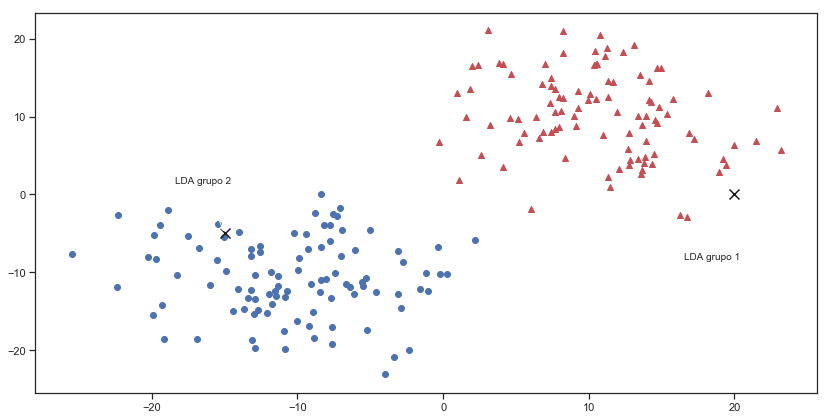

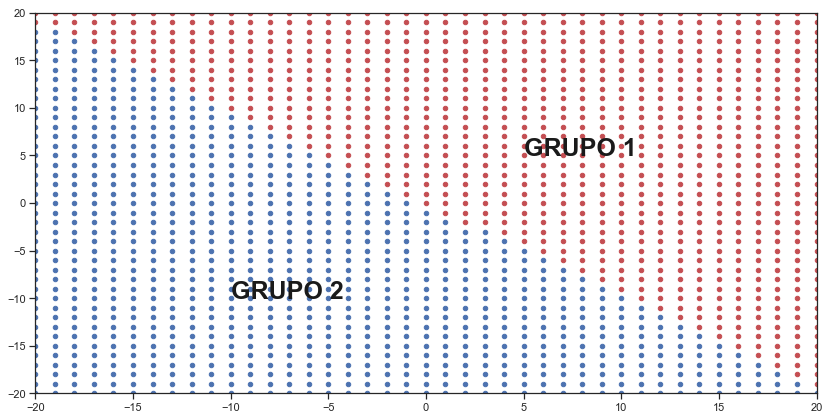

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Datos gaussianos:
mu1, sigma1 = 10, 5.5
X1 = mu1 + sigma1*np.random.randn(100,2)
mu2, sigma2 = -10, 5.5
X2 = mu2 + sigma2*np.random.randn(100,2)

# Representar gráficamente los datos de entrenamiento: 
plt.figure(figsize=(14,7))
ax0 = plt.subplot(111)
plt.scatter(X1[:,0],X1[:,1],marker ='^',c='r')
plt.scatter(X2[:,0],X2[:,1],marker ='o',c='b')

# Concatenar los dos conjuntos de puntos:
XT = np.concatenate((X1,X2))

# Etiquetar los datos como tipo 1 o tipo 2:
label1 = np.ones(X1.shape[0])
label2 = 2*np.ones(X2.shape[0])
labelT = np.concatenate((label1,label2))

# Fase de entrenamiento: 
clf = LinearDiscriminantAnalysis(n_components=2,priors=None)
clf.fit(XT, labelT)

#Fase de predicciÛn:
print(clf.predict([[20, 0]])) #predicciÛn para el dato [20,0]
print(clf.predict([[5, -20]]))#predicciÛn para el dato [5,-20]

# RepresentaciÛn de la predicciÛn de los datos [20,0] y [5,-20]:
plt.scatter(20,0,s=100,marker ='x',c='k')
plt.annotate('LDA grupo 1',xy=(20,-2),xycoords='data',
               xytext=(-50,-50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->")) 
plt.scatter(-15,-5,s=100,marker ='x',c='k')
plt.annotate('LDA grupo 2',xy=(-15,-5),xycoords='data',
               xytext=(-50,50),
               textcoords='offset points',
               arrowprops=dict(arrowstyle="->")) 

# PredicciÛn de datos en una retÌcula:
plt.figure(figsize=(14,7))
for i in range(-20,21,1):
    for k in range(-20,21,1):
        p = clf.predict([[i, k]])
        if p == 1:
             plt.scatter(i,k,s=20,marker='o',c='r')
        else:
             plt.scatter(i,k,s=20,marker = 'o',c='b')

plt.axis([-20,20,-20,20])
plt.text(5,5,'GRUPO 1',fontsize=25,fontweight='bold',color='k')
plt.text(-10,-10,'GRUPO 2',fontsize=25,fontweight='bold',color='k')
plt.show()

**Example: LDA on UCI wine dataset:**


In [ ]:
import numpy as np
import pylab
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

import csv
Names=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]
DATA=[]
csv.register_dialect('myDialect', delimiter= ';', skipinitialspace=True)

with open('winequality-white.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, dialect="myDialect")
    for row in spamreader:
        L=[]
        for i in row :
            L.append(float(i))
        DATA.append(L)

#remove first line, ex-name of data
DATA=DATA[1:len(DATA)]

Training=[]
Qual=[]
for row in DATA:
    Training.append(row[0:11])
    Qual.append(row[11])
csvfile.close()


# We cut the data in two sets, one for validation one for training
Validation=Training[len(Training)-100:len(Training)]
Training=Training[:len(Training)-100]

clf = LinearDiscriminantAnalysis(n_components=11,priors=None)
clf.fit(Training, Qual[:len(Training)])

print(clf.predict([[8, 0.3, 0.4, 8, 0.05, 30, 180, 1, 3.3, 0.5, 10]])) 

#let's compute the confusion matrix with the Validation data-set and the Quality corresponding

Prediction=[]
for i  in Validation :
    Prediction.append(float(clf.predict([i])))
print("Confusion matrix :")
print(confusion_matrix(Qual[len(Training):],Prediction))
print("Here are the Cij, number of prediction made in group i but which are supposed to be in group j \nQuality goes from", min (min(Qual[len(Training):]),min(Prediction))," to ",max(max(Qual[len(Training):]),max(Prediction)) )


[5.]
Confusion matrix :
[[ 1  0  2  0  0]
 [ 1 13 10  0  0]
 [ 0 10 39  7  0]
 [ 1  0  9  6  0]
 [ 0  0  1  0  0]]
Here are the Cij, number of prediction made in group i but which are supposed to be in group j 
Quality goes from 4.0  to  8.0


/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 7 - 1) = 6 components.
  ChangedBehaviorWarning)
/Users/raulbenitez/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:472: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


**Exercise: Two-class discriminant analysis with 2D features:**

Consider the training set: 

Class $\omega_1$: $\mathcal{D}_1 =\{(3,4),(2,6),(4,6),(3,8)\}$. 

Class $\omega_2$: $\mathcal{D}_2 =\{(3,0),(1,-2),(5,-2),(3,-4)\}$. 

- Obtain sample estimates of the mean and covariance matrix for each class.

- Obtain the discriminant functions $g_1(\vec{x}),g_2(\vec{x})$ assuming equal priors.

- Evaluate $g_1(\vec{x}),g_2(\vec{x})$ to classify a new observation $\vec{x}_{new} = (2,-1)$.

Result: $g_1(\vec{x}) = -(x_1-3)^2-\frac{1}{4}(x_2-6)^2$, $g_2(\vec{x}) = -\frac{1}{4}(x_1-3)^2-\frac{1}{4}(x_2+2)^2$.
\end{exampleblock}


## 2.2 NAÏVE BAYES

Assume that features $x_i$ in observation $\vec{x}$ are class-independent. Then the likelihood function factorizes as:
\begin{equation*}
p(\vec{x}|\omega_i) = \prod_{i=1}^d p(x_i|\omega_i)
\end{equation*}
We can select the distribution function that follows each feature, either discrete or continous, thus providing a very flexible method. \\
Choosing univariate normal distributions for each feature $x_i \sim N(\mu_i,\sigma_i^2)$, the discriminant function $g_i(\vec{x})$ is: 
%
\begin{equation*}
g_i(\vec{x}) = -\frac{d}{2}\log 2\pi -d \log \sigma_i - \frac{1}{2\sigma_i}\sum_{i=1}^d (x_i-\mu_i)^2 + \log p(\omega_i)
\end{equation*}


In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print(y_pred)

from sklearn.metrics import confusion_matrix
y_true = iris.target
confusion_matrix(y_true, y_pred)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

## 2.3 K-nearest neighbours (KNN)

Very simple algorithm: An unlabeled observation is classified by assigning the label which is most frequent among the k training samples nearest to that point (i.e. the k-th nearest neighbours).

knn.png![image.png](attachment:image.png)

In [ ]:
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y) 
Xnew = np.array([2.5]).reshape(1, -1)
print(knn.predict(Xnew))
Xnew1 = np.array([0.5]).reshape(1, -1)
print(knn.predict(Xnew1))


[1]
[0]


## 3.3 DECISION TREES

- Classification And Regression Tress (CART): Solve both regression and classification problems. 

- Tree creation: We start from a training set of labelled observations. Data is splitted in child nodes by using binary queries. The query at each split is selected accoding to a measure of node impurity: A node is said to be pure if all the observations have the same label. 

- The grow of the binary tree creates a set of linear decision boundaries splitting the data in different groups.



**EXAMPLE: The UCI mushroom dataset**

https://archive.ics.uci.edu/ml/datasets/mushroom

table_mushroom.png![image.png](attachment:image.png)


**Example: Constructing a decision tree:** 
For each feature, we shoud evaluate how well it splits the data in classes in such a way that each value of the feature contains only one of the classes. One of the evaluation measures is to count how many observations are classified according to the majority of classes in each feature value. Fos instance, the feature cap-shape has two features: convex and bell. If we choose convex, most of the observations are poisonous (3 over a total of 5). A value bell classifies the two observations as edible, so the total goodness of the feature will be (3+2)/7 = 0.71. We proceed similarly with the other features and the result is that all are equally good. So we can choose one of them randomly. Image we select the feature cap-color to split the data. Then we will have three groups according to the three possible values of the feature cap-color. For the value cap-color = brown, the tree ends classifying the observation as poisonous. Something similar occurs for the value yellow,  for which the two observations are classified as edible. In the case cap-color = white we should further develop the tree using the remaining features. For this reduced set ob 4 observations, we should evaluate the goodness of each of the features. Selecting the feature cap-shape will have a goodness of (2+2)/4 = 1 since the valuers bell correctly classify all obsdervations as edible and the value convex as poisonous. The feature gill-color can not do it better: The performance is (2+1)/4=0.75. Then we choose cap-shape and proceed to complete the decision tree as in the following figure: 

decision_tree_result.png![image.png](attachment:image.png)

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

data = pd.read_csv("agaricus-lepiota.data")
data.columns=["class","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing",
                                                    "gill-size","gill-color","stalk-shape","stalk-root",
                                                    "stalk-surface-above-ring","stalk-surface-below-ring",
                                                    "stalk-color-above-ring","stalk-color-below-ring",
                                                    "veil-type","veil-color","ring-number","ring-type",
                                                    "spore-print-color","population","habitat"]

# numeric coding of variables
encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

    
y = data['class'].values
X = data.drop('class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, y, test_size = 0.30, random_state=21)
    

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)


Represent the resulting tree structure for the test data:

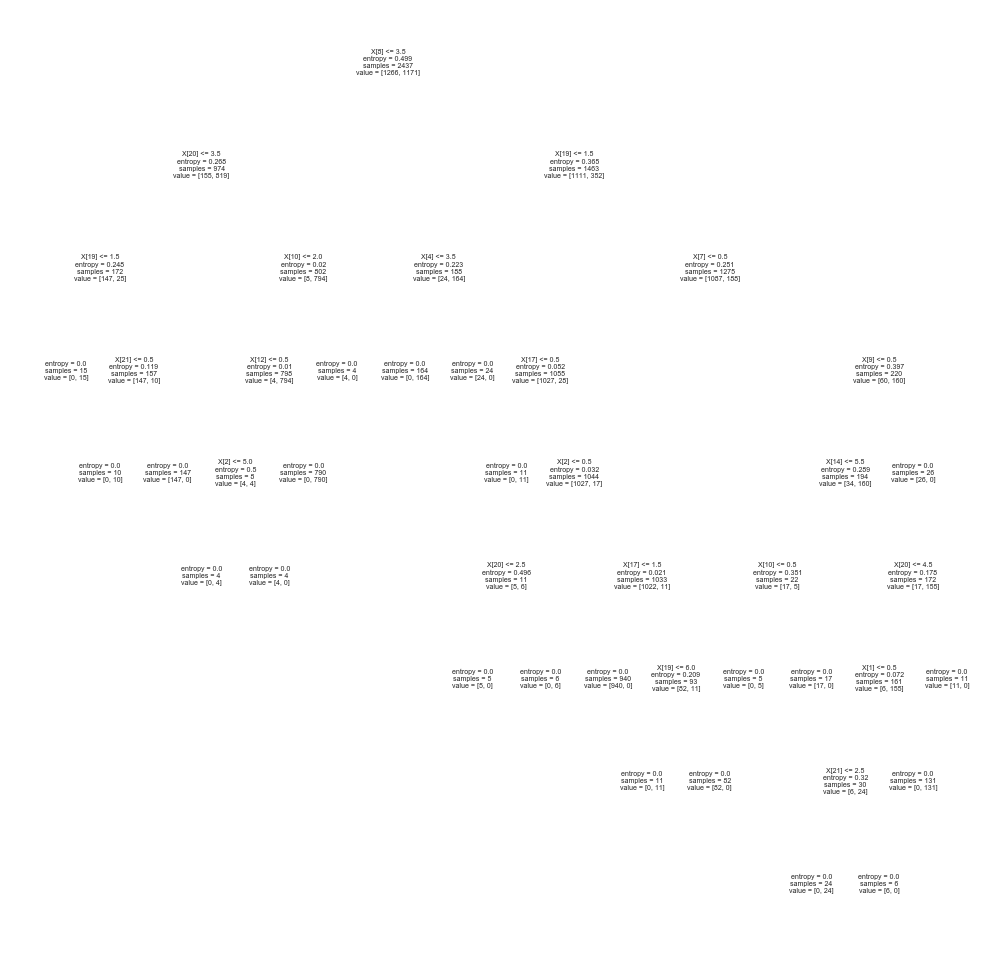

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(17,17))
ax = plot_tree(clf.fit(X_test,Y_test)) 
plt.show()

** EXERCISE: Represent the decision boundary of the tree in a mutildimensional scatter plot (numerical features):**

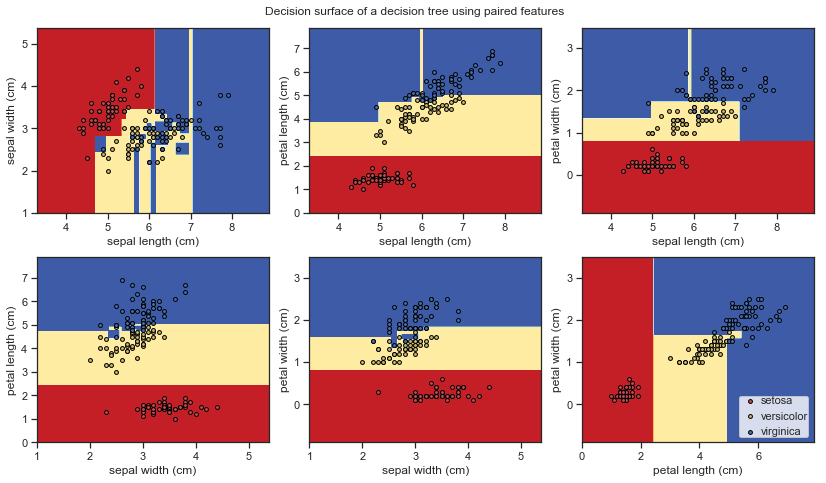

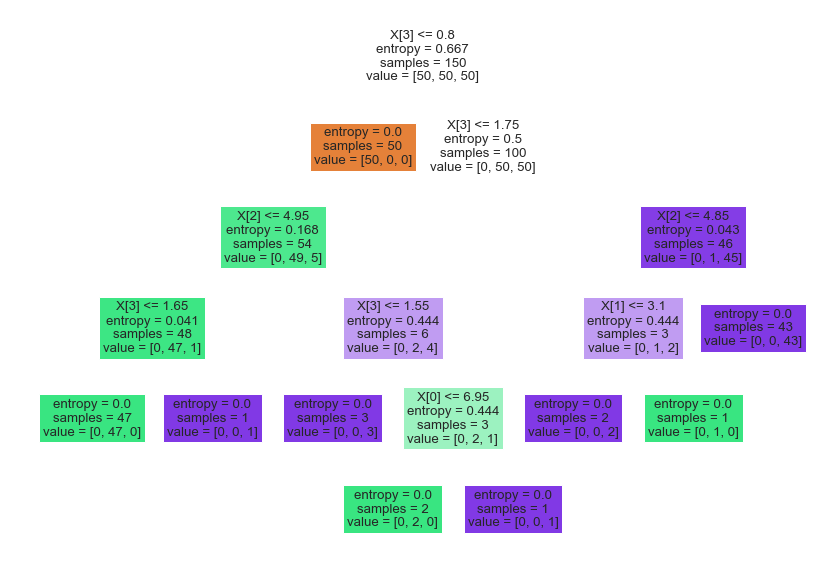

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

plt.figure(figsize=(12,7))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(14,10))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()